# Importe das bibliotecas, abrindo os arquivos .h5
- Ajeitando as colunas do Background e dos dados para manter um padrão entre os nomes das variáveis

In [ ]:
#!python3 -m pip install --user mplhep
!pip install --user mplhep
import mplhep as hep

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import h5py
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
from joblib import load

Mounted at /content/drive


In [ ]:
PATH = '/content/drive/MyDrive/Amostras_4Anomalos_Macedo/'
PATH_ = '/content/drive/MyDrive/Amostras_4Anomalos_Macedo_Eventos/'
PATH_PLOT = '/content/drive/MyDrive/Ptos_Backgrond_Signal_ANOMALOS/'
PATH2 = '/content/drive/MyDrive/LGBM_Multiclass_ANOMALO_WWCEP_ Drecision_Tree/'
raiz_s = 13000
plt.style.use([hep.style.ROOT, hep.style.firamath])

In [ ]:
# Corte na região de sinal e adicionado corte na Massa Invariante do W

def open_file_back( file ):
    df = None
    with h5py.File( file , 'r' ) as f:
        dset_columns = f['columns']
        dset_dados = f['dados']
        #print( '\n colunas --> ', np.array( dset_columns ),'\n' )
        df = pd.DataFrame( np.array(dset_dados), columns = np.array( dset_columns))
        df[b'Mpps'] = raiz_s * ( np.sqrt( df[b'xi1'] * df[b'xi2'] ) )
        df[b'Ypps'] = 1/2 * np.log( df[b'xi1'] / df[b'xi2'] )
        df[b'Mww/Mpps'] = df[b'W_Mass'] / df[b'Mpps']
        df[b'Ypps-Yww'] = df[b'Ypps'] - df[b'W_rapidity']
        df[b'label'] = 0

        #df_cut = (df[b'muon_pt'] > 53)  & (df[b'muon_eta'] < 2.4) & (df[b'jetAK8_pt'] > 200) & (df[b'btag'] == 0) &  (df[b'xi1'] > 0.04) & (df[b'xi2'] > 0.04) & (df[b'xi1'] < 0.111) & (df[b'xi2'] < 0.138)   & (df[b'jetAK8_prunedMass'] > 65) & (df[b'jetAK8_prunedMass'] < 105)  &  (df[b'jet_eta'] < 2.4) & (df[b'METPt'] > 40) & (df[b'W_pt_lep'] > 200)
        df_cut = (df[b'muon_pt'] > 53) & (df[b'xi1'] > 0.04) & (df[b'W_Mass'] > 600) & (df[b'xi2'] > 0.04) & (df[b'xi1'] < 0.111) & (df[b'xi2'] < 0.138) & (df[b'muon_eta'] < 2.4) & (df[b'jetAK8_pt'] > 200) & (df[b'jet_eta'] < 2.4) & (df[b'METPt'] > 40) & (df[b'W_pt_lep'] > 200)

        dset = df[df_cut]
        return dset


def open_file_dados( file ):
    df = None
    with h5py.File( file , 'r' ) as f:
        dset_columns = f['columns']
        dset_dados = f['dados']
        #print( '\n colunas --> ', np.array( dset_columns ),'\n' )
        df = pd.DataFrame( np.array(dset_dados), columns = np.array( dset_columns))
        df[b'Mpps'] = raiz_s * ( np.sqrt( df[b'xi1'] * df[b'xi2'] ) )
        df[b'Ypps'] = 1/2 * np.log( df[b'xi1'] / df[b'xi2'] )
        df[b'Mww/Mpps'] = df[b'W_Mass'] / df[b'Mpps']
        df[b'Ypps-Yww'] = df[b'Ypps'] - df[b'W_rapidity']

        #df_cut = (df[b'muon_pt'] > 53)  & (df[b'muon_eta'] < 2.4) & (df[b'jetAK8_pt'] > 200) & (df[b'btag'] == 0) &  (df[b'xi1'] > 0.04) & (df[b'xi2'] > 0.04) & (df[b'xi1'] < 0.111) & (df[b'xi2'] < 0.138)   & (df[b'jetAK8_prunedMass'] > 65) & (df[b'jetAK8_prunedMass'] < 105)  &  (df[b'jet_eta'] < 2.4) & (df[b'METPt'] > 40) & (df[b'W_pt_lep'] > 200)
        df_cut = (df[b'muon_pt'] > 53) & (df[b'xi1'] > 0.04) & (df[b'xi2'] > 0.04) & (df[b'W_Mass'] > 600) & (df[b'xi1'] < 0.111) & (df[b'xi2'] < 0.138) & (df[b'muon_eta'] < 2.4) & (df[b'jetAK8_pt'] > 200) & (df[b'jet_eta'] < 2.4) & (df[b'METPt'] > 40) & (df[b'W_pt_lep'] > 200)
        dset = df[df_cut]
        return dset



def open_file_signal( file ):
    df = None
    with h5py.File( file , 'r' ) as f:
        dset_columns = f['columns']
        dset_dados = f['dados']
        #print( '\n colunas --> ', np.array( dset_columns ),'\n' )
        df = pd.DataFrame( np.array(dset_dados), columns = np.array( dset_columns))
        df[b'Mpps'] = raiz_s * ( np.sqrt( df[b'xi1'] * df[b'xi2'] ) )
        df[b'Ypps'] = 1/2 * np.log( df[b'xi1'] / df[b'xi2'] )
        df[b'Mww/Mpps'] = df[b'W_Mass'] / df[b'Mpps']
        df[b'Ypps-Yww'] = df[b'Ypps'] - df[b'W_rapidity']
        df[b'label'] = 1

        #df_cut = (df[b'muon_pt'] > 53)  & (df[b'muon_eta'] < 2.4) & (df[b'jetAK8_pt'] > 200) & (df[b'btag'] == 0) &  (df[b'xi1'] > 0.04) & (df[b'xi2'] > 0.04) & (df[b'xi1'] < 0.111) & (df[b'xi2'] < 0.138)   & (df[b'jetAK8_prunedMass'] > 65) & (df[b'jetAK8_prunedMass'] < 105)  &  (df[b'jetAK8_eta'] < 2.4) & (df[b'METPt'] > 40) & (df[b'W_pt_lep'] > 200)
        df_cut = (df[b'muon_pt'] > 53) & (df[b'xi1'] > 0.04) & (df[b'xi2'] > 0.04) & (df[b'W_Mass'] > 600) & (df[b'xi1'] < 0.111) & (df[b'xi2'] < 0.138) & (df[b'muon_eta'] < 2.4) & (df[b'jetAK8_pt'] > 200) & (df[b'jetAK8_eta'] < 2.4) & (df[b'METPt'] > 40) & (df[b'W_pt_lep'] > 200)
        dset = df[df_cut]
        return dset






def open_file_SM( file ):
    df = None
    with h5py.File( file , 'r' ) as f:
        dset_columns = f['columns']
        dset_dados = f['dados']
        #print( '\n colunas --> ', np.array( dset_columns ),'\n' )
        df = pd.DataFrame( np.array(dset_dados), columns = np.array( dset_columns))
        df[b'Mpps'] = raiz_s * ( np.sqrt( df[b'xi1'] * df[b'xi2'] ) )
        df[b'Ypps'] = 1/2 * np.log( df[b'xi1'] / df[b'xi2'] )
        df[b'Mww/Mpps'] = df[b'W_Mass'] / df[b'Mpps']
        df[b'Ypps-Yww'] = df[b'Ypps'] - df[b'W_rapidity']
        df[b'label'] = 2

        #df_cut = (df[b'muon_pt'] > 53)  & (df[b'muon_eta'] < 2.4) & (df[b'jetAK8_pt'] > 200) & (df[b'btag'] == 0) &  (df[b'xi1'] > 0.04) & (df[b'xi2'] > 0.04) & (df[b'xi1'] < 0.111) & (df[b'xi2'] < 0.138)   & (df[b'jetAK8_prunedMass'] > 65) & (df[b'jetAK8_prunedMass'] < 105)  &  (df[b'jetAK8_eta'] < 2.4) & (df[b'METPt'] > 40) & (df[b'W_pt_lep'] > 200)
        df_cut = (df[b'muon_pt'] > 53) & (df[b'xi1'] > 0.04) & (df[b'xi2'] > 0.04) & (df[b'W_Mass'] > 600) & (df[b'xi1'] < 0.111) & (df[b'xi2'] < 0.138) & (df[b'muon_eta'] < 2.4) & (df[b'jetAK8_pt'] > 200) & (df[b'jetAK8_eta'] < 2.4) & (df[b'METPt'] > 40) & (df[b'W_pt_lep'] > 200)
        dset = df[df_cut]
        return dset






In [ ]:
Drell_Yan = open_file_back(PATH_ + 'DataSet_multiRP_DrellYan.h5')
QCD = open_file_back(PATH_ + 'DataSet_multiRP_QCD.h5')
Single_top = open_file_back(PATH_ + 'DataSet_multiRP_single_top.h5')
VV_Inclusivo = open_file_back(PATH_ + 'DataSet_multiRP_VV_inclusivo.h5')
W_Jets = open_file_back(PATH_ + 'DataSet_multiRP_WJets.h5')
TT_bar = open_file_back(PATH_ + 'DataSet_TTbar.h5')

#back_concat = pd.concat([Drell_Yan, QCD, Single_top, VV_Inclusivo, W_Jets, TT_bar])

data = open_file_dados(PATH_ + 'DataSet_dados_multiRP.h5')


A01 = open_file_signal( PATH_ + 'output-DataSet_ANOMALO1_multiRP.h5' )
A02 = open_file_signal( PATH_ + 'output-DataSet_ANOMALO2_multiRP.h5' )
A03 = open_file_signal( PATH_ + 'output-DataSet_ANOMALO3_multiRP.h5' )
A04 = open_file_signal( PATH_ + 'output-DataSet_ANOMALO4_multiRP.h5' )
A05 = open_file_signal( PATH_ + 'output-DataSet_ANOMALO5_multiRP.h5' )
A06 = open_file_signal( PATH_ + 'output-DataSet_ANOMALO6_multiRP.h5' )
A07 = open_file_signal( PATH_ + 'output-DataSet_ANOMALO7_multiRP.h5' )
A08 = open_file_signal( PATH_ + 'output-DataSet_ANOMALO8_multiRP.h5' )

SM = open_file_SM( PATH_ + 'output-SM_multiRP.h5' )


In [ ]:
columns_ = [ b'W_Mass', b'W_pt_lep', b'dPhi_Whad_Wlep',b'dPhi_jatos_MET', b'jetAK8_pt', b'jetAK8_eta',
                b'jetAK8_prunedMass',      b'jetAK8_tau21',             b'METPt',
                b'muon_pt',          b'muon_eta',       b'ExtraTracks',
               b'PUWeight',        b'W_rapidity',              b'btag',
                b'xi1',               b'xi2',b'ismultirp1',        b'ismultirp2',
                b'Norm',
                  b'weight',              b'Mpps',              b'Ypps',
                b'Mww/Mpps',          b'Ypps-Yww', b'label']


columns_data = [ b'W_Mass', b'W_pt_lep', b'dPhi_Whad_Wlep',b'dPhi_jatos_MET', b'jetAK8_pt', b'jetAK8_eta',
                b'jetAK8_prunedMass',      b'jetAK8_tau21',             b'METPt',
                b'muon_pt',          b'muon_eta',       b'ExtraTracks',
               b'PUWeight',        b'W_rapidity',              b'btag',
                b'xi1',               b'xi2',b'ismultirp1',        b'ismultirp2',
                              b'Mpps',              b'Ypps',
                b'Mww/Mpps',          b'Ypps-Yww']




DrellYan = pd.DataFrame( np.array(Drell_Yan),columns=columns_ )
QCD_ = pd.DataFrame( np.array(QCD),columns=columns_ )
SingleTop = pd.DataFrame( np.array(Single_top),columns=columns_ )
VVInclusivo = pd.DataFrame( np.array(VV_Inclusivo),columns=columns_ )
Wjets = pd.DataFrame( np.array(W_Jets),columns=columns_ )
TTbar = pd.DataFrame( np.array(TT_bar),columns=columns_ )

data_set_dados_multirp = pd.DataFrame( np.array(data),columns=columns_data )

concat_back = pd.concat([DrellYan, QCD_, SingleTop, VVInclusivo, Wjets, TTbar])

concat_back[b'label'] = 0

# Preparando o modelo de Machine Learning para o treino dos eventos
- DataSet_ANMLX, DataSet_TrainX, DataSet_TestX, label_train_ANMLX, label_test_ANMLX

In [ ]:
DataSet_ANML01 = pd.concat([A01, concat_back, SM])
DataSet_ANML02 = pd.concat([A02, concat_back, SM])
DataSet_ANML03 = pd.concat([A03, concat_back, SM])
DataSet_ANML04 = pd.concat([A04, concat_back, SM])
DataSet_ANML05 = pd.concat([A05, concat_back, SM])
DataSet_ANML06 = pd.concat([A06, concat_back, SM])
DataSet_ANML07 = pd.concat([A07, concat_back, SM])
DataSet_ANML08 = pd.concat([A08, concat_back, SM])

In [ ]:
from sklearn.model_selection import train_test_split

test_size_ = 0.5

DataSet_Train1_, DataSet_Test1_ = train_test_split( DataSet_ANML01, test_size = test_size_, random_state=42, stratify=DataSet_ANML01[b'label'] )
DataSet_Train2_, DataSet_Test2_ = train_test_split( DataSet_ANML02, test_size = test_size_, random_state=42, stratify=DataSet_ANML02[b'label'] )
DataSet_Train3_, DataSet_Test3_ = train_test_split( DataSet_ANML03, test_size = test_size_, random_state=42, stratify=DataSet_ANML03[b'label'] )
DataSet_Train4_, DataSet_Test4_ = train_test_split( DataSet_ANML04, test_size = test_size_, random_state=42, stratify=DataSet_ANML04[b'label'] )
DataSet_Train5_, DataSet_Test5_ = train_test_split( DataSet_ANML05, test_size = test_size_, random_state=42, stratify=DataSet_ANML05[b'label'] )
DataSet_Train6_, DataSet_Test6_ = train_test_split( DataSet_ANML06, test_size = test_size_, random_state=42, stratify=DataSet_ANML06[b'label'] )
DataSet_Train7_, DataSet_Test7_ = train_test_split( DataSet_ANML07, test_size = test_size_, random_state=42, stratify=DataSet_ANML07[b'label'] )
DataSet_Train8_, DataSet_Test8_ = train_test_split( DataSet_ANML08, test_size = test_size_, random_state=42, stratify=DataSet_ANML08[b'label'] )

In [ ]:
label_train_ANML1 = DataSet_Train1_[b'label']
label_test_ANML1 = DataSet_Test1_[b'label']

label_train_ANML2 = DataSet_Train2_[b'label']
label_test_ANML2 = DataSet_Test2_[b'label']

label_train_ANML3 = DataSet_Train3_[b'label']
label_test_ANML3 = DataSet_Test3_[b'label']

label_train_ANML4 = DataSet_Train4_[b'label']
label_test_ANML4 = DataSet_Test4_[b'label']

label_train_ANML5 = DataSet_Train5_[b'label']
label_test_ANML5 = DataSet_Test5_[b'label']

label_train_ANML6 = DataSet_Train6_[b'label']
label_test_ANML6 = DataSet_Test6_[b'label']

label_train_ANML7 = DataSet_Train7_[b'label']
label_test_ANML7 = DataSet_Test7_[b'label']

label_train_ANML8 = DataSet_Train8_[b'label']
label_test_ANML8 = DataSet_Test8_[b'label']

In [ ]:
colunas = [b'W_Mass', b'W_pt_lep', b'dPhi_Whad_Wlep', b'dPhi_jatos_MET', b'jetAK8_pt', b'jetAK8_eta', b'jetAK8_prunedMass', b'jetAK8_tau21', b'METPt', b'muon_pt', b'muon_eta', b'ExtraTracks', b'W_rapidity', b'xi1', b'xi2',b'Mpps', b'Ypps', b'Mww/Mpps', b'Ypps-Yww']

In [ ]:
#X_ANML1_train[colunas]

DataSet_Train1 = DataSet_Train1_[colunas]
DataSet_Test1 = DataSet_Test1_[colunas]

DataSet_Train2 = DataSet_Train2_[colunas]
DataSet_Test2 = DataSet_Test2_[colunas]

DataSet_Train3 = DataSet_Train3_[colunas]
DataSet_Test3 = DataSet_Test3_[colunas]

DataSet_Train4 = DataSet_Train4_[colunas]
DataSet_Test4 = DataSet_Test4_[colunas]

DataSet_Train5 = DataSet_Train5_[colunas]
DataSet_Test5 = DataSet_Test5_[colunas]

DataSet_Train6 = DataSet_Train6_[colunas]
DataSet_Test6 = DataSet_Test6_[colunas]

DataSet_Train7 = DataSet_Train7_[colunas]
DataSet_Test7 = DataSet_Test7_[colunas]

DataSet_Train8 = DataSet_Train8_[colunas]
DataSet_Test8 = DataSet_Test8_[colunas]

In [ ]:
DataSet_Test1_weight_backg = DataSet_Test1_[DataSet_Test1_[ b'label']==0][b'weight']
DataSet_Test1_weight_signal = DataSet_Test1_[DataSet_Test1_[ b'label']==1][b'weight']
DataSet_Test1_weight_SM = DataSet_Test1_[DataSet_Test1_[ b'label']==2][b'weight']


DataSet_Test8_weight_backg = DataSet_Test8_[DataSet_Test8_[ b'label']==0][b'weight']
DataSet_Test8_weight_signal = DataSet_Test8_[DataSet_Test8_[ b'label']==1][b'weight']
DataSet_Test8_weight_SM = DataSet_Test8_[DataSet_Test8_[ b'label']==2][b'weight']


DataSet_Test7_weight_backg = DataSet_Test7_[DataSet_Test7_[ b'label']==0][b'weight']
DataSet_Test7_weight_signal = DataSet_Test7_[DataSet_Test7_[ b'label']==1][b'weight']
DataSet_Test7_weight_SM = DataSet_Test7_[DataSet_Test7_[ b'label']==2][b'weight']


DataSet_Test6_weight_backg = DataSet_Test6_[DataSet_Test6_[ b'label']==0][b'weight']
DataSet_Test6_weight_signal = DataSet_Test6_[DataSet_Test6_[ b'label']==1][b'weight']
DataSet_Test6_weight_SM = DataSet_Test6_[DataSet_Test6_[ b'label']==2][b'weight']


DataSet_Test5_weight_backg = DataSet_Test5_[DataSet_Test5_[ b'label']==0][b'weight']
DataSet_Test5_weight_signal = DataSet_Test5_[DataSet_Test5_[ b'label']==1][b'weight']
DataSet_Test5_weight_SM = DataSet_Test5_[DataSet_Test5_[ b'label']==2][b'weight']


DataSet_Test1_weight_backg = DataSet_Test1_[DataSet_Test1_[ b'label']==0][b'weight']
DataSet_Test1_weight_signal = DataSet_Test1_[DataSet_Test1_[ b'label']==1][b'weight']
DataSet_Test1_weight_SM = DataSet_Test1_[DataSet_Test1_[ b'label']==2][b'weight']


DataSet_Test2_weight_backg = DataSet_Test2_[DataSet_Test2_[ b'label']==0][b'weight']
DataSet_Test2_weight_signal = DataSet_Test2_[DataSet_Test2_[ b'label']==1][b'weight']
DataSet_Test2_weight_SM = DataSet_Test2_[DataSet_Test2_[ b'label']==2][b'weight']


DataSet_Test3_weight_backg = DataSet_Test3_[DataSet_Test3_[ b'label']==0][b'weight']
DataSet_Test3_weight_signal = DataSet_Test3_[DataSet_Test3_[ b'label']==1][b'weight']
DataSet_Test3_weight_SM = DataSet_Test3_[DataSet_Test3_[ b'label']==2][b'weight']


DataSet_Test4_weight_backg = DataSet_Test4_[DataSet_Test4_[ b'label']==0][b'weight']
DataSet_Test4_weight_signal = DataSet_Test4_[DataSet_Test4_[ b'label']==1][b'weight']
DataSet_Test4_weight_SM = DataSet_Test4_[DataSet_Test4_[ b'label']==2][b'weight']

# Treino dos dados, usando VotingClassifier
- LogisticRegression, XGBClassifier, LGBMClassifier

In [ ]:
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from joblib import dump, load
from sklearn.metrics import make_scorer,fbeta_score,precision_score,recall_score,accuracy_score,log_loss,roc_auc_score,classification_report,f1_score,confusion_matrix,roc_curve,precision_recall_curve,average_precision_score


from sklearn.ensemble import VotingClassifier

In [ ]:
log_clf = LogisticRegression(solver = 'newton-cg', random_state = 42)
rnd_clf = XGBClassifier( objective = 'multiclass', n_estimators = 4000, learning_rate = 0.001, random_state = 42)
lgbm_clf = LGBMClassifier(objective = 'multiclass',  num_class = 3, n_estimators = 4000, metric = 'multi_logloss', learning_rate = 0.001, boosting_type = 'gbdt', random_state = 42)

voting_clf_soft = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('lgbm', lgbm_clf)],
    voting='soft')



In [ ]:
# fit to a new voting classifier with the 'soft' parameter. 

# ANOMALO 5

#svm_clf = LGBMClassifier(gamma="scale", random_state=42,probability=True)
voting_clf_soft5 = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('lgbm', lgbm_clf)],
    voting='soft')

# fit here
search_result5_Multiclass_logloss_scale_pos_weight = voting_clf_soft5.fit(DataSet_Train5, label_train_ANML5)

dump(search_result5_Multiclass_logloss_scale_pos_weight, PATH + 'VotingClassifier_Soft_Multiclass_ANOMALO5**_DataDriven.joblib')


# Anomalo 1
voting_clf_soft1 = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('lgbm', lgbm_clf)],
    voting='soft')

# fit here
search_result1_Multiclass_logloss_scale_pos_weight = voting_clf_soft1.fit(DataSet_Train1, label_train_ANML1)

dump(search_result1_Multiclass_logloss_scale_pos_weight, PATH2 + 'VotingClassifier_Soft_Multiclass_ANOMALO1_DataDriven.joblib')



# Anomlo 2
voting_clf_soft2 = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('lgbm', lgbm_clf)],
    voting='soft')

# fit here
search_result2_Multiclass_logloss_scale_pos_weight = voting_clf_soft2.fit(DataSet_Train2, label_train_ANML2)

dump(search_result2_Multiclass_logloss_scale_pos_weight, PATH2 + 'VotingClassifier_Soft_Multiclass_ANOMALO2_DataDriven.joblib')



# Anomalo 3
voting_clf_soft3 = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('lgbm', lgbm_clf)],
    voting='soft')

# fit here
search_result3_Multiclass_logloss_scale_pos_weight = voting_clf_soft3.fit(DataSet_Train3, label_train_ANML3)

dump(search_result3_Multiclass_logloss_scale_pos_weight, PATH2 + 'VotingClassifier_Soft_Multiclass_ANOMALO3_DataDriven.joblib')

# Anomalo 4
voting_clf_soft4 = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('lgbm', lgbm_clf)],
    voting='soft')

# fit here
search_result4_Multiclass_logloss_scale_pos_weight = voting_clf_soft4.fit(DataSet_Train4, label_train_ANML4)

dump(search_result4_Multiclass_logloss_scale_pos_weight, PATH2 + 'VotingClassifier_Soft_Multiclass_ANOMALO4_DataDriven.joblib')

# Anomalo 5
voting_clf_soft5 = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('lgbm', lgbm_clf)],
    voting='soft')

# fit here
search_result5_Multiclass_logloss_scale_pos_weight = voting_clf_soft5.fit(DataSet_Train5, label_train_ANML5)

dump(search_result5_Multiclass_logloss_scale_pos_weight, PATH2 + 'VotingClassifier_Soft_Multiclass_ANOMALO5_DataDriven.joblib')


# Anomalo 6
voting_clf_soft6 = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('lgbm', lgbm_clf)],
    voting='soft')

# fit here
search_result6_Multiclass_logloss_scale_pos_weight = voting_clf_soft6.fit(DataSet_Train6, label_train_ANML6)

dump(search_result6_Multiclass_logloss_scale_pos_weight, PATH2 + 'VotingClassifier_Soft_Multiclass_ANOMALO6_DataDriven.joblib')

# Anomalo 7
voting_clf_soft7 = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('lgbm', lgbm_clf)],
    voting='soft')

# fit here
search_result7_Multiclass_logloss_scale_pos_weight = voting_clf_soft7.fit(DataSet_Train7, label_train_ANML7)

dump(search_result7_Multiclass_logloss_scale_pos_weight, PATH2 + 'VotingClassifier_Soft_Multiclass_ANOMALO7_DataDriven.joblib')


# Anomalo 8
voting_clf_soft8 = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('lgbm', lgbm_clf)],
    voting='soft')

# fit here
search_result8_Multiclass_logloss_scale_pos_weight = voting_clf_soft8.fit(DataSet_Train8, label_train_ANML8)

dump(search_result8_Multiclass_logloss_scale_pos_weight, PATH2 + 'VotingClassifier_Soft_Multiclass_ANOMALO8_DataDriven.joblib')


'\n# ANOMALO 5\n\n#svm_clf = LGBMClassifier(gamma="scale", random_state=42,probability=True)\nvoting_clf_soft5 = VotingClassifier(\n    estimators=[(\'lr\', log_clf), (\'rf\', rnd_clf), (\'lgbm\', lgbm_clf)],\n    voting=\'soft\')\n\n# fit here\nsearch_result5_Multiclass_logloss_scale_pos_weight = voting_clf_soft5.fit(DataSet_Train5, label_train_ANML5)\n\ndump(search_result5_Multiclass_logloss_scale_pos_weight, PATH + \'VotingClassifier_Soft_Multiclass_ANOMALO5**_DataDriven.joblib\')\n\n\n# Anomalo 1\nvoting_clf_soft1 = VotingClassifier(\n    estimators=[(\'lr\', log_clf), (\'rf\', rnd_clf), (\'lgbm\', lgbm_clf)],\n    voting=\'soft\')\n\n# fit here\nsearch_result1_Multiclass_logloss_scale_pos_weight = voting_clf_soft1.fit(DataSet_Train1, label_train_ANML1)\n\ndump(search_result1_Multiclass_logloss_scale_pos_weight, PATH2 + \'VotingClassifier_Soft_Multiclass_ANOMALO1_DataDriven.joblib\')\n\n\n\n# Anomlo 2\nvoting_clf_soft2 = VotingClassifier(\n    estimators=[(\'lr\', log_clf), (\'rf\'

In [ ]:
search_result1_Multiclass_logloss_scale_pos_weight = load(PATH2 + 'VotingClassifier_Soft_Multiclass_ANOMALO1_DataDriven.joblib')
search_result2_Multiclass_logloss_scale_pos_weight = load(PATH2 + 'VotingClassifier_Soft_Multiclass_ANOMALO2_DataDriven.joblib')
search_result3_Multiclass_logloss_scale_pos_weight = load(PATH2 + 'VotingClassifier_Soft_Multiclass_ANOMALO3_DataDriven.joblib')
search_result4_Multiclass_logloss_scale_pos_weight = load(PATH2 + 'VotingClassifier_Soft_Multiclass_ANOMALO4_DataDriven.joblib')
search_result5_Multiclass_logloss_scale_pos_weight = load(PATH  + 'VotingClassifier_Soft_Multiclass_ANOMALO5**_DataDriven.joblib')
search_result6_Multiclass_logloss_scale_pos_weight = load(PATH2 + 'VotingClassifier_Soft_Multiclass_ANOMALO6_DataDriven.joblib')
search_result7_Multiclass_logloss_scale_pos_weight = load(PATH2 + 'VotingClassifier_Soft_Multiclass_ANOMALO7_DataDriven.joblib')
search_result8_Multiclass_logloss_scale_pos_weight = load(PATH2 + 'VotingClassifier_Soft_Multiclass_ANOMALO8_DataDriven.joblib')

In [ ]:
# ANOMALO 1 --> classifier_accuracy_score = 0.9984848296675319

# Distribuição de probabilidade

In [ ]:
from sklearn.preprocessing import label_binarize
def result( X_test, Y_test, X_train, Y_train, model, label, verbose = 1 ):
    print(' ---------------- ' + label + '----------------' )
    '''scaler = StandardScaler()
    X_scaled_test = scaler.fit_transform(X_test)
    X_scaled_train = scaler.fit_transform(X_train)'''
    
    predict_proba_test = model.predict_proba(X_test)  # calculate the probability
    predict_proba_train = model.predict_proba(X_train)  # calculate the probability

    label_test = label_binarize( Y_test, classes = [ *range(3) ] )
    precision_test = dict()
    recall_test = dict()
    threshs_test = dict()

    for i in range(3):
        precision_test[i], recall_test[i], threshs_test[i] = precision_recall_curve( label_test[:,i], predict_proba_test[:,i] )

    thresholds_test = np.concatenate( [ threshs_test[1], [1] ], axis = 0 )
    bidx_test = np.argmax( precision_test[1] * recall_test[1] )
    best_cut_test = threshs_test[1][bidx_test]
    print('best cut test--> ', best_cut_test)
    y_preds_test = [ np.argmax(line) for line in predict_proba_test > best_cut_test ]

    label_train = label_binarize( Y_train, classes = [ *range(3) ] )
    precision_train = dict()
    recall_train = dict()
    threshs_train = dict()

    for i in range(3):
        precision_train[i], recall_train[i], threshs_train[i] = precision_recall_curve( label_train[:,i], predict_proba_train[:,i] )

    thresholds_train = np.concatenate( [ threshs_train[1], [1] ], axis = 0 )
    bidx_train = np.argmax( precision_train[1] * recall_train[1] )
    best_cut_train = threshs_test[1][bidx_train]
    print('best cut train -->', best_cut_train)
    y_preds_train = [ np.argmax(line) for line in predict_proba_train > best_cut_train ]    

    if verbose == 1:
        print("Purity in test sample     : {:2.2f}%".format(100 * precision_score(Y_test, y_preds_test, average = 'weighted')))
        print("Efficiency in test sample : {:2.2f}%".format(100 * recall_score(Y_test, y_preds_test, average = 'weighted')))
        print( "F1_score in test sample  : {:2.2f}%".format(100 * f1_score(Y_test, y_preds_test, average = 'weighted')))
        print('\n')
        print("Purity in train sample     : {:2.2f}%".format(100 * precision_score(Y_train, y_preds_train, average = 'weighted')))
        print("Efficiency in train sample : {:2.2f}%".format(100 * recall_score(Y_train, y_preds_train, average = 'weighted')))
        print( "F1_score in train sample  : {:2.2f}%".format(100 * f1_score(Y_train, y_preds_train, average = 'weighted')))    

    return predict_proba_test, best_cut_test 

In [ ]:
predict_proba5, best_cut5 = result(DataSet_Test5, label_test_ANML5, DataSet_Train5, label_train_ANML5, search_result5_Multiclass_logloss_scale_pos_weight, 'ANOMALO5' )

 ---------------- ANOMALO5----------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['bytes']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['bytes']. An error will be raised in 1.2.
  FutureWarning,


best cut test-->  0.10906349668785525
best cut train --> 0.007044277670234332
Purity in test sample     : 99.79%


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Efficiency in test sample : 99.87%
F1_score in test sample  : 99.83%


Purity in train sample     : 99.66%
Efficiency in train sample : 99.83%
F1_score in train sample  : 99.75%


In [ ]:
predict_proba1, best_cut1 = result(DataSet_Test1, label_test_ANML1, DataSet_Train1, label_train_ANML1, search_result1_Multiclass_logloss_scale_pos_weight, 'ANOMALO1' )

 ---------------- ANOMALO1----------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['bytes']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['bytes']. An error will be raised in 1.2.
  FutureWarning,


best cut test-->  0.31555616196680875
best cut train --> 0.0026723141256558094


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Purity in test sample     : 99.75%
Efficiency in test sample : 99.81%
F1_score in test sample  : 99.78%


Purity in train sample     : 97.99%
Efficiency in train sample : 98.99%
F1_score in train sample  : 98.49%


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
predict_proba2, best_cut2 = result(DataSet_Test2, label_test_ANML2, DataSet_Train2, label_train_ANML2, search_result2_Multiclass_logloss_scale_pos_weight, 'ANOMALO2' )

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['bytes']. An error will be raised in 1.2.
  FutureWarning,


 ---------------- ANOMALO2----------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['bytes']. An error will be raised in 1.2.
  FutureWarning,


best cut test-->  0.18119240925130498
best cut train --> 0.0025701143242247487


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Purity in test sample     : 99.81%
Efficiency in test sample : 99.88%
F1_score in test sample  : 99.85%


Purity in train sample     : 99.66%
Efficiency in train sample : 99.83%
F1_score in train sample  : 99.74%


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
predict_proba3, best_cut3 = result(DataSet_Test3, label_test_ANML3, DataSet_Train3, label_train_ANML3, search_result3_Multiclass_logloss_scale_pos_weight, 'ANOMALO3' )

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['bytes']. An error will be raised in 1.2.
  FutureWarning,


 ---------------- ANOMALO3----------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['bytes']. An error will be raised in 1.2.
  FutureWarning,


best cut test-->  0.26877383070185
best cut train --> 0.002603307257704555
Purity in test sample     : 99.86%
Efficiency in test sample : 99.86%
F1_score in test sample  : 99.83%


Purity in train sample     : 99.34%
Efficiency in train sample : 99.67%
F1_score in train sample  : 99.51%


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
predict_proba4, best_cut4 = result(DataSet_Test4, label_test_ANML4, DataSet_Train4, label_train_ANML4, search_result4_Multiclass_logloss_scale_pos_weight, 'ANOMALO4' )

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['bytes']. An error will be raised in 1.2.
  FutureWarning,


 ---------------- ANOMALO4----------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['bytes']. An error will be raised in 1.2.
  FutureWarning,


best cut test-->  0.31894967847998706
best cut train --> 0.0026051433632430614


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Purity in test sample     : 99.80%
Efficiency in test sample : 99.87%
F1_score in test sample  : 99.83%


Purity in train sample     : 98.96%
Efficiency in train sample : 99.48%
F1_score in train sample  : 99.22%


In [ ]:
predict_proba6, best_cut6 = result(DataSet_Test6, label_test_ANML6, DataSet_Train6, label_train_ANML6, search_result6_Multiclass_logloss_scale_pos_weight, 'ANOMALO6' )

 ---------------- ANOMALO6----------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['bytes']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['bytes']. An error will be raised in 1.2.
  FutureWarning,


best cut test-->  0.19917743764526985
best cut train --> 0.003142109597180979


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Purity in test sample     : 99.79%
Efficiency in test sample : 99.86%
F1_score in test sample  : 99.82%


Purity in train sample     : 99.51%
Efficiency in train sample : 99.75%
F1_score in train sample  : 99.63%


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
predict_proba7, best_cut7 = result(DataSet_Test7, label_test_ANML7, DataSet_Train7, label_train_ANML7, search_result7_Multiclass_logloss_scale_pos_weight, 'ANOMALO7' )

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['bytes']. An error will be raised in 1.2.
  FutureWarning,


 ---------------- ANOMALO7----------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['bytes']. An error will be raised in 1.2.
  FutureWarning,


best cut test-->  0.31643815404050013
best cut train --> 0.002610576452181795
Purity in test sample     : 99.86%
Efficiency in test sample : 99.87%
F1_score in test sample  : 99.84%


Purity in train sample     : 99.05%
Efficiency in train sample : 99.52%
F1_score in train sample  : 99.28%


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
predict_proba8, best_cut8 = result(DataSet_Test8, label_test_ANML8, DataSet_Train8, label_train_ANML8, search_result8_Multiclass_logloss_scale_pos_weight, 'ANOMALO8' )

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['bytes']. An error will be raised in 1.2.
  FutureWarning,


 ---------------- ANOMALO8----------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['bytes']. An error will be raised in 1.2.
  FutureWarning,


best cut test-->  0.39684116393967045
best cut train --> 0.002674656334665057
Purity in test sample     : 99.76%


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Efficiency in test sample : 99.83%
F1_score in test sample  : 99.79%


Purity in train sample     : 97.89%
Efficiency in train sample : 98.94%
F1_score in train sample  : 98.41%


# MAke the Plot

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['bytes']. An error will be raised in 1.2.
  FutureWarning,


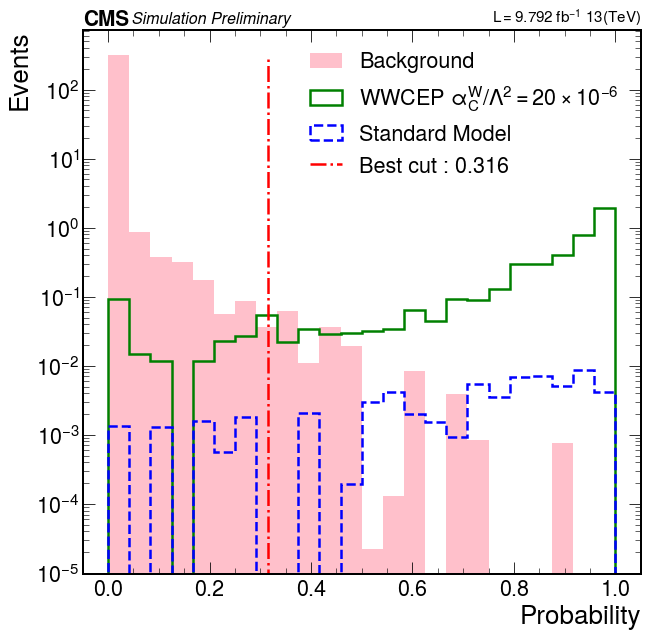

In [ ]:
# ANOMALO 1
predict_dados = search_result1_Multiclass_logloss_scale_pos_weight.predict_proba(data_set_dados_multirp[ colunas ])[:,1]
bins = 25


hbgt_lgb = plt.hist( predict_proba1[ label_test_ANML1 == 0 ][:,1], bins = np.linspace(0,1,bins), alpha=1, histtype = 'bar', color = 'pink', label = 'Background', weights = DataSet_Test1_weight_backg / test_size_ )
plt.hist( predict_proba1[ label_test_ANML1 == 1 ][:,1], bins = np.linspace(0,1,bins), ls='-', linewidth=2.5, histtype = 'step', label = r'WWCEP $\alpha_{C}^{W}/\Lambda^{2} = 20 \times 10^{-6}$', weights = DataSet_Test1_weight_signal / test_size_, color = 'green' )
plt.hist( predict_proba1[ label_test_ANML1 == 2 ][:,1], bins = np.linspace(0,1,bins), ls='--', linewidth=2.5, histtype = 'step', label = 'Standard Model', weights = DataSet_Test1_weight_SM / test_size_, color = 'blue' )

plt.yscale('log')
uppery_lgb=np.max(hbgt_lgb[0])
plt.plot( [ best_cut1,best_cut1],[0,uppery_lgb],"-.r", linewidth=2.5,  label='Best cut : {:2.3f}'.format( best_cut1 ) )

'''  
counts_1, bin_edges_1 = np.histogram( predict_dados[ predict_dados < best_cut1 ] , bins = np.linspace(0,1,bins) )   
errors_1 = np.sqrt( counts_1 )
bin_centres_1 = ( bin_edges_1[:-1] + bin_edges_1[1:] ) / 2.
plt.errorbar( bin_centres_1, counts_1, yerr=errors_1, xerr=abs(bin_centres_1[1] - bin_centres_1[2])/2, fmt='.', label = 'Data-2016', color = 'black' )
'''

n_events_back_after_cut1 = predict_proba1[ label_test_ANML1 == 0 ][:,1] > best_cut1
n_events_signal_after_cut1 = predict_proba1[ label_test_ANML1 == 1 ][:,1] > best_cut1
n_events_SM_after_cut1 = predict_proba1[ label_test_ANML1 == 2 ][:,1] > best_cut1
n_eventos_Data_after_cut1 = predict_dados[ predict_dados >= best_cut5 ]


plt.xlabel('Probability')
plt.ylabel('Events')
plt.legend(loc = 'best')
plt.title = hep.cms.label( label="Preliminary", rlabel=r"$\mathcal{L} = 9.792\;fb^{-1}$ 13(TeV)", fontsize = 16 )

plt.savefig(PATH_PLOT + 'ANOMALO1.png', dpi = 300)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['bytes']. An error will be raised in 1.2.
  FutureWarning,


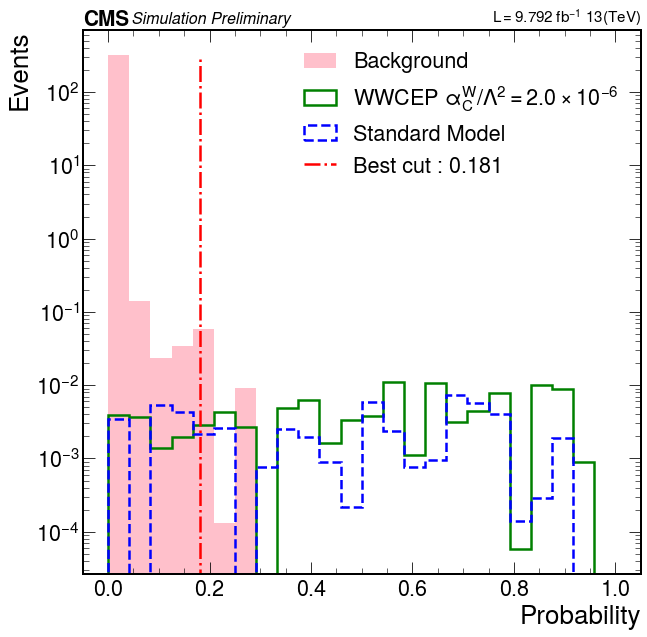

In [ ]:
# ANOMALO 2
predict_dados = search_result2_Multiclass_logloss_scale_pos_weight.predict_proba(data_set_dados_multirp[ colunas ])[:,1]
bins = 25

hbgt_lgb = plt.hist( predict_proba2[ label_test_ANML2 == 0 ][:,1], bins = np.linspace(0,1,bins), alpha=1, histtype = 'bar', color = 'pink', label = 'Background', weights = DataSet_Test2_weight_backg / test_size_ )
plt.hist( predict_proba2[ label_test_ANML2 == 1 ][:,1], bins = np.linspace(0,1,bins), ls='-', linewidth=2.5, histtype = 'step', label = r'WWCEP $\alpha_{C}^{W}/\Lambda^{2} = 2.0 \times 10^{-6}$', weights = DataSet_Test2_weight_signal / test_size_, color = 'green' )
plt.hist( predict_proba2[ label_test_ANML2 == 2 ][:,1], bins = np.linspace(0,1,bins), ls='--', linewidth=2.5, histtype = 'step', label = 'Standard Model', weights = DataSet_Test2_weight_SM / test_size_, color = 'blue' )

plt.yscale('log')
uppery_lgb=np.max(hbgt_lgb[0])
plt.plot( [ best_cut2,best_cut2],[0,uppery_lgb],"-.r", linewidth=2.5,  label='Best cut : {:2.3f}'.format( best_cut2 ) )

'''  
counts_1, bin_edges_1 = np.histogram( predict_dados[ predict_dados < best_cut2 ] , bins = np.linspace(0,1,bins) )   
errors_1 = np.sqrt( counts_1 )
bin_centres_1 = ( bin_edges_1[:-1] + bin_edges_1[1:] ) / 2.
plt.errorbar( bin_centres_1, counts_1, yerr=errors_1, xerr=abs(bin_centres_1[1] - bin_centres_1[2])/2, fmt='.', label = 'Data-2016', color = 'black' )
'''

n_events_back_after_cut2 = predict_proba2[ label_test_ANML2 == 0 ][:,1] > best_cut2
n_events_signal_after_cut2 = predict_proba2[ label_test_ANML2 == 1 ][:,1] > best_cut2
n_events_SM_after_cut2 = predict_proba2[ label_test_ANML2 == 2 ][:,1] > best_cut2
n_eventos_Data_after_cut2 = predict_dados[ predict_dados >= best_cut2 ]

plt.xlabel('Probability')
plt.ylabel('Events')
plt.legend(loc = 'best')
plt.title = hep.cms.label( label="Preliminary", rlabel=r"$\mathcal{L} = 9.792\;fb^{-1}$ 13(TeV)", fontsize = 16 )

plt.savefig(PATH_PLOT + 'ANOMALO2.png', dpi = 300)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['bytes']. An error will be raised in 1.2.
  FutureWarning,


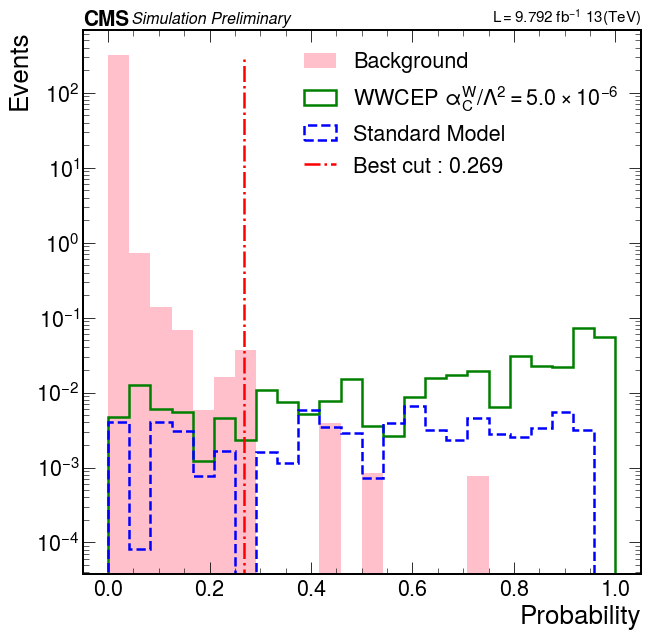

In [ ]:
# ANOMALO 3
predict_dados = search_result3_Multiclass_logloss_scale_pos_weight.predict_proba(data_set_dados_multirp[ colunas ])[:,1]
bins = 25

hbgt_lgb = plt.hist( predict_proba3[ label_test_ANML3 == 0 ][:,1], bins = np.linspace(0,1,bins), alpha=1, histtype = 'bar', color = 'pink', label = 'Background', weights = DataSet_Test3_weight_backg / test_size_ )
plt.hist( predict_proba3[ label_test_ANML3 == 1 ][:,1], bins = np.linspace(0,1,bins), ls='-', linewidth=2.5, histtype = 'step', label = r'WWCEP $\alpha_{C}^{W}/\Lambda^{2} = 5.0 \times 10^{-6}$', weights = DataSet_Test3_weight_signal / test_size_, color = 'green' )
plt.hist( predict_proba3[ label_test_ANML3 == 2 ][:,1], bins = np.linspace(0,1,bins), ls='--', linewidth=2.5, histtype = 'step', label = 'Standard Model', weights = DataSet_Test3_weight_SM / test_size_, color = 'blue' )

plt.yscale('log')
uppery_lgb=np.max(hbgt_lgb[0])
plt.plot( [ best_cut3,best_cut3],[0,uppery_lgb],"-.r", linewidth=2.5,  label='Best cut : {:2.3f}'.format( best_cut3 ) )

''' 
counts_1, bin_edges_1 = np.histogram( predict_dados[ predict_dados < best_cut3 ] , bins = np.linspace(0,1,bins) )   
errors_1 = np.sqrt( counts_1 )
bin_centres_1 = ( bin_edges_1[:-1] + bin_edges_1[1:] ) / 2.
plt.errorbar( bin_centres_1, counts_1, yerr=errors_1, xerr=abs(bin_centres_1[1] - bin_centres_1[2])/2, fmt='.', label = 'Data-2016', color = 'black' )
'''

n_events_back_after_cut3 = predict_proba3[ label_test_ANML3 == 0 ][:,1] > best_cut3
n_events_signal_after_cut3 = predict_proba3[ label_test_ANML3 == 1 ][:,1] > best_cut3
n_events_SM_after_cut3 = predict_proba3[ label_test_ANML3 == 2 ][:,1] > best_cut3
n_eventos_Data_after_cut3 = predict_dados[ predict_dados >= best_cut3 ]

plt.xlabel('Probability')
plt.ylabel('Events')
plt.legend(loc = 'best')
plt.title = hep.cms.label( label="Preliminary", rlabel=r"$\mathcal{L} = 9.792\;fb^{-1}$ 13(TeV)", fontsize = 16 )

plt.savefig(PATH_PLOT + 'ANOMALO3.png', dpi = 300)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['bytes']. An error will be raised in 1.2.
  FutureWarning,


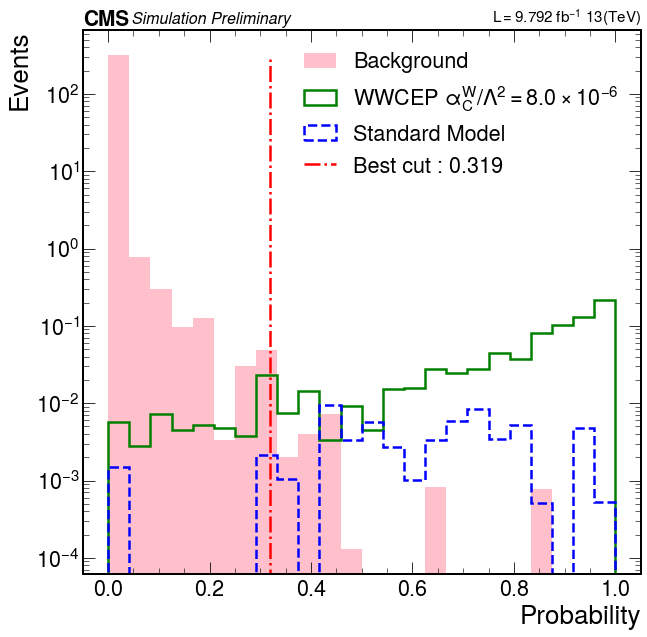

In [ ]:
# ANOMALO 4
predict_dados = search_result4_Multiclass_logloss_scale_pos_weight.predict_proba(data_set_dados_multirp[ colunas ])[:,1]
bins = 25

hbgt_lgb = plt.hist( predict_proba4[ label_test_ANML4 == 0 ][:,1], bins = np.linspace(0,1,bins), alpha=1, histtype = 'bar', color = 'pink', label = 'Background', weights = DataSet_Test4_weight_backg / test_size_ )
plt.hist( predict_proba4[ label_test_ANML4 == 1 ][:,1], bins = np.linspace(0,1,bins), ls='-', linewidth=2.5, histtype = 'step', label = r'WWCEP $\alpha_{C}^{W}/\Lambda^{2} = 8.0 \times 10^{-6}$', weights = DataSet_Test4_weight_signal / test_size_, color = 'green' )
plt.hist( predict_proba4[ label_test_ANML4 == 2 ][:,1], bins = np.linspace(0,1,bins), ls='--', linewidth=2.5, histtype = 'step', label = 'Standard Model', weights = DataSet_Test4_weight_SM / test_size_, color = 'blue' )

plt.yscale('log')
uppery_lgb=np.max(hbgt_lgb[0])
plt.plot( [ best_cut4,best_cut4],[0,uppery_lgb],"-.r", linewidth=2.5,  label='Best cut : {:2.3f}'.format( best_cut4 ) )

'''  
counts_1, bin_edges_1 = np.histogram( predict_dados[ predict_dados < best_cut4 ] , bins = np.linspace(0,1,bins) )   
errors_1 = np.sqrt( counts_1 )
bin_centres_1 = ( bin_edges_1[:-1] + bin_edges_1[1:] ) / 2.
plt.errorbar( bin_centres_1, counts_1, yerr=errors_1, xerr=abs(bin_centres_1[1] - bin_centres_1[2])/2, fmt='.', label = 'Data-2016', color = 'black' )
'''

n_events_back_after_cut4 = predict_proba4[ label_test_ANML4 == 0 ][:,1] > best_cut4
n_events_signal_after_cut4 = predict_proba4[ label_test_ANML4 == 1 ][:,1] > best_cut4
n_events_SM_after_cut4 = predict_proba4[ label_test_ANML4 == 2 ][:,1] > best_cut4
n_eventos_Data_after_cut4 = predict_dados[ predict_dados >= best_cut4 ]

plt.xlabel('Probability')
plt.ylabel('Events')
plt.legend(loc = 'best')
plt.title = hep.cms.label( label="Preliminary", rlabel=r"$\mathcal{L} = 9.792\;fb^{-1}$ 13(TeV)", fontsize = 16 )

plt.savefig(PATH_PLOT + 'ANOMALO4.png', dpi = 300)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['bytes']. An error will be raised in 1.2.
  FutureWarning,


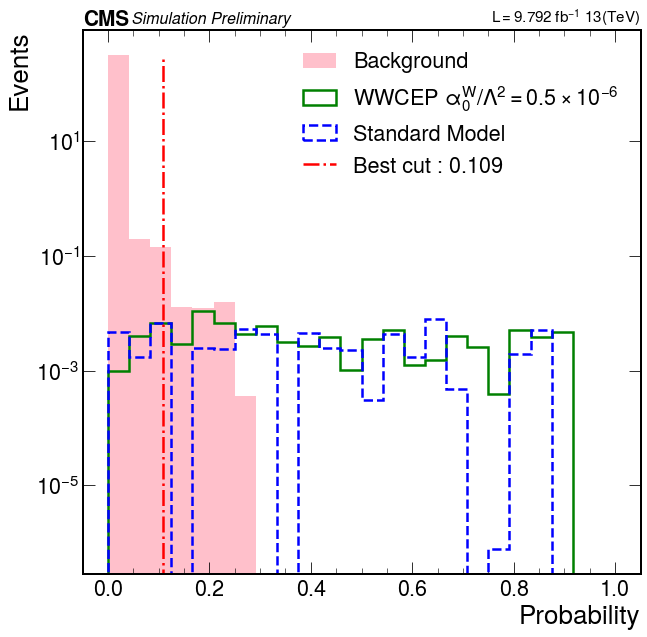

In [ ]:
# ANOMALO 5
predict_dados = search_result5_Multiclass_logloss_scale_pos_weight.predict_proba(data_set_dados_multirp[ colunas ])[:,1]
bins = 25

hbgt_lgb = plt.hist( predict_proba5[ label_test_ANML5 == 0 ][:,1], bins = np.linspace(0,1,bins), alpha=1, histtype = 'bar', color = 'pink', label = 'Background', weights = DataSet_Test5_weight_backg / test_size_ )
plt.hist( predict_proba5[ label_test_ANML5 == 1 ][:,1], bins = np.linspace(0,1,bins), ls='-', linewidth=2.5, histtype = 'step', label = r'WWCEP $\alpha_{0}^{W}/\Lambda^{2} = 0.5 \times 10^{-6}$', weights = DataSet_Test5_weight_signal / test_size_, color = 'green' )
plt.hist( predict_proba5[ label_test_ANML5 == 2 ][:,1], bins = np.linspace(0,1,bins), ls='--', linewidth=2.5, histtype = 'step', label = 'Standard Model', weights = DataSet_Test5_weight_SM / test_size_, color = 'blue' )

plt.yscale('log')
uppery_lgb=np.max(hbgt_lgb[0])
plt.plot( [ best_cut5,best_cut5],[0,uppery_lgb],"-.r", linewidth=2.5,  label='Best cut : {:2.3f}'.format( best_cut5 ) )

'''  
counts_1, bin_edges_1 = np.histogram( predict_dados[ predict_dados < best_cut5 ] , bins = np.linspace(0,1,bins) )   
errors_1 = np.sqrt( counts_1 )
bin_centres_1 = ( bin_edges_1[:-1] + bin_edges_1[1:] ) / 2.
plt.errorbar( bin_centres_1, counts_1, yerr=errors_1, xerr=abs(bin_centres_1[1] - bin_centres_1[2])/2, fmt='.', label = 'Data-2016', color = 'black' )
'''

n_events_back_after_cut5 = predict_proba5[ label_test_ANML5 == 0 ][:,1] > best_cut5
n_events_signal_after_cut5 = predict_proba5[ label_test_ANML5 == 1 ][:,1] > best_cut5
n_events_SM_after_cut5 = predict_proba5[ label_test_ANML5 == 2 ][:,1] > best_cut5
n_eventos_Data_after_cut5 = predict_dados[ predict_dados >= best_cut5 ]

plt.xlabel('Probability')
plt.ylabel('Events')
plt.legend(loc = 'best')
plt.title = hep.cms.label( label="Preliminary", rlabel=r"$\mathcal{L} = 9.792\;fb^{-1}$ 13(TeV)", fontsize = 16 )

plt.savefig(PATH_PLOT + 'ANOMALO5.png', dpi = 300)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['bytes']. An error will be raised in 1.2.
  FutureWarning,


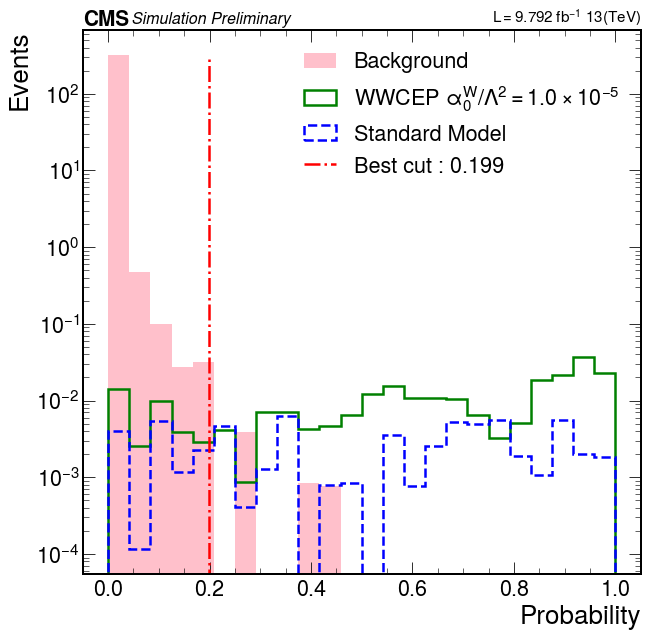

In [ ]:
# ANOMALO 6 
predict_dados = search_result6_Multiclass_logloss_scale_pos_weight.predict_proba(data_set_dados_multirp[ colunas ])[:,1]
bins = 25

hbgt_lgb = plt.hist( predict_proba6[ label_test_ANML6 == 0 ][:,1], bins = np.linspace(0,1,bins), alpha=1, histtype = 'bar', color = 'pink', label = 'Background', weights = DataSet_Test6_weight_backg / test_size_ )
plt.hist( predict_proba6[ label_test_ANML6 == 1 ][:,1], bins = np.linspace(0,1,bins), ls='-', linewidth=2.5, histtype = 'step', label = r'WWCEP $\alpha_{0}^{W}/\Lambda^{2} = 1.0 \times 10^{-5}$', weights = DataSet_Test6_weight_signal / test_size_, color = 'green' )
plt.hist( predict_proba6[ label_test_ANML6 == 2 ][:,1], bins = np.linspace(0,1,bins), ls='--', linewidth=2.5, histtype = 'step', label = 'Standard Model', weights = DataSet_Test6_weight_SM / test_size_, color = 'blue' )

plt.yscale('log')
uppery_lgb=np.max(hbgt_lgb[0])
plt.plot( [ best_cut6,best_cut6],[0,uppery_lgb],"-.r", linewidth=2.5,  label='Best cut : {:2.3f}'.format( best_cut6 ) )

'''  
counts_1, bin_edges_1 = np.histogram( predict_dados[ predict_dados < best_cut6 ] , bins = np.linspace(0,1,bins) )   
errors_1 = np.sqrt( counts_1 )
bin_centres_1 = ( bin_edges_1[:-1] + bin_edges_1[1:] ) / 2.
plt.errorbar( bin_centres_1, counts_1, yerr=errors_1, xerr=abs(bin_centres_1[1] - bin_centres_1[2])/2, fmt='.', label = 'Data-2016', color = 'black' )
'''

n_events_back_after_cut6 = predict_proba6[ label_test_ANML6 == 0 ][:,1] > best_cut6
n_events_signal_after_cut6 = predict_proba6[ label_test_ANML6 == 1 ][:,1] > best_cut6
n_events_SM_after_cut6 = predict_proba6[ label_test_ANML6 == 2 ][:,1] > best_cut6
n_eventos_Data_after_cut6 = predict_dados[ predict_dados >= best_cut6 ]

plt.xlabel('Probability')
plt.ylabel('Events')
plt.legend(loc = 'best')
plt.title = hep.cms.label( label="Preliminary", rlabel=r"$\mathcal{L} = 9.792\;fb^{-1}$ 13(TeV)", fontsize = 16 )

plt.savefig(PATH_PLOT + 'ANOMALO6.png', dpi = 300)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['bytes']. An error will be raised in 1.2.
  FutureWarning,


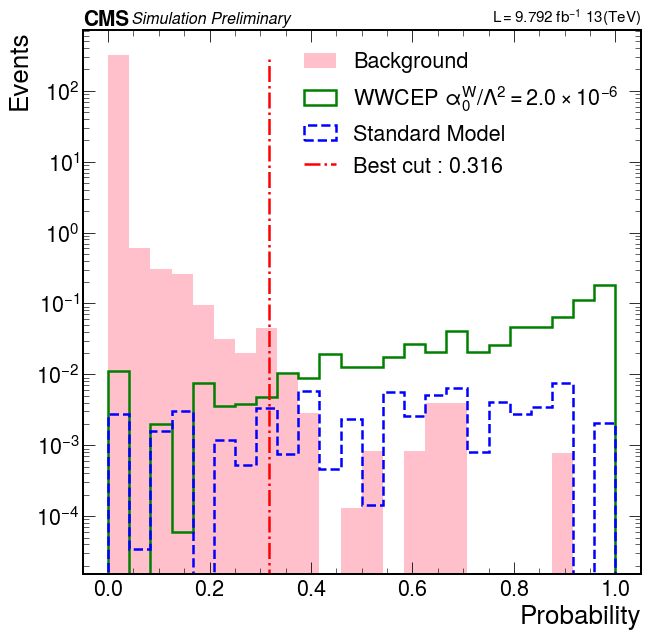

In [ ]:
# ANOMALO 7 
predict_dados = search_result7_Multiclass_logloss_scale_pos_weight.predict_proba(data_set_dados_multirp[ colunas ])[:,1]
bins = 25

hbgt_lgb = plt.hist( predict_proba7[ label_test_ANML7 == 0 ][:,1], bins = np.linspace(0,1,bins), alpha=1, histtype = 'bar', color = 'pink', label = 'Background', weights = DataSet_Test7_weight_backg / test_size_ )
plt.hist( predict_proba7[ label_test_ANML7 == 1 ][:,1], bins = np.linspace(0,1,bins), ls='-', linewidth=2.5, histtype = 'step', label = r'WWCEP $\alpha_{0}^{W}/\Lambda^{2} = 2.0 \times 10^{-6}$', weights = DataSet_Test7_weight_signal / test_size_, color = 'green' )
plt.hist( predict_proba7[ label_test_ANML7 == 2 ][:,1], bins = np.linspace(0,1,bins), ls='--', linewidth=2.5, histtype = 'step', label = 'Standard Model', weights = DataSet_Test7_weight_SM / test_size_, color = 'blue' )

plt.yscale('log')
uppery_lgb=np.max(hbgt_lgb[0])
plt.plot( [ best_cut7,best_cut7],[0,uppery_lgb],"-.r", linewidth=2.5,  label='Best cut : {:2.3f}'.format( best_cut7 ) )

'''  
counts_1, bin_edges_1 = np.histogram( predict_dados[ predict_dados < best_cut7 ] , bins = np.linspace(0,1,bins) )   
errors_1 = np.sqrt( counts_1 )
bin_centres_1 = ( bin_edges_1[:-1] + bin_edges_1[1:] ) / 2.
plt.errorbar( bin_centres_1, counts_1, yerr=errors_1, xerr=abs(bin_centres_1[1] - bin_centres_1[2])/2, fmt='.', label = 'Data-2016', color = 'black' )
'''

n_events_back_after_cut7 = predict_proba7[ label_test_ANML7 == 0 ][:,1] > best_cut7
n_events_signal_after_cut7 = predict_proba7[ label_test_ANML7 == 1 ][:,1] > best_cut7
n_events_SM_after_cut7 = predict_proba7[ label_test_ANML7 == 2 ][:,1] > best_cut7
n_eventos_Data_after_cut7 = predict_dados[ predict_dados >= best_cut7 ]

plt.xlabel('Probability')
plt.ylabel('Events')
plt.legend(loc = 'best')
plt.title = hep.cms.label( label="Preliminary", rlabel=r"$\mathcal{L} = 9.792\;fb^{-1}$ 13(TeV)", fontsize = 16 )

plt.savefig(PATH_PLOT + 'ANOMALO7.png', dpi = 300)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['bytes']. An error will be raised in 1.2.
  FutureWarning,


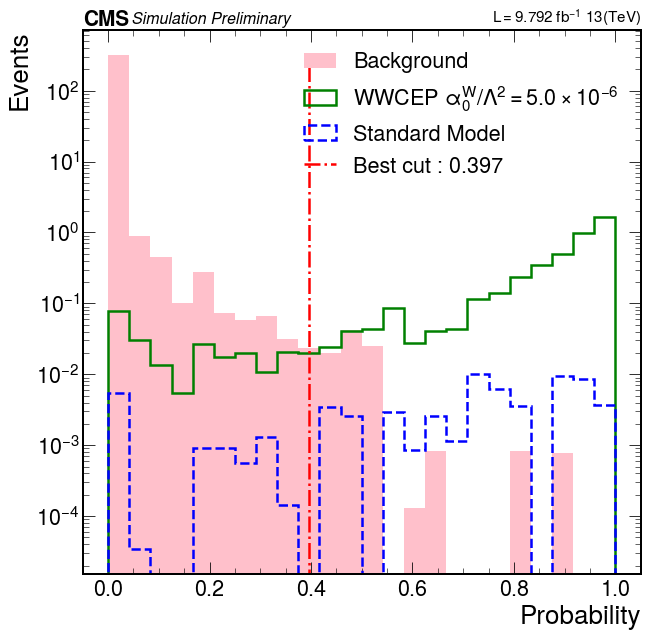

In [ ]:
# ANOMALO 8
predict_dados = search_result8_Multiclass_logloss_scale_pos_weight.predict_proba(data_set_dados_multirp[ colunas ])[:,1]
bins = 25

hbgt_lgb = plt.hist( predict_proba8[ label_test_ANML8 == 0 ][:,1], bins = np.linspace(0,1,bins), alpha=1, histtype = 'bar', color = 'pink', label = 'Background', weights = DataSet_Test8_weight_backg / test_size_ )
plt.hist( predict_proba8[ label_test_ANML8 == 1 ][:,1], bins = np.linspace(0,1,bins), ls='-', linewidth=2.5, histtype = 'step', label = r'WWCEP $\alpha_{0}^{W}/\Lambda^{2} = 5.0 \times 10^{-6}$', weights = DataSet_Test8_weight_signal / test_size_, color = 'green' )
plt.hist( predict_proba8[ label_test_ANML8 == 2 ][:,1], bins = np.linspace(0,1,bins), ls='--', linewidth=2.5, histtype = 'step', label = 'Standard Model', weights = DataSet_Test8_weight_SM / test_size_, color = 'blue' )

plt.yscale('log')
uppery_lgb=np.max(hbgt_lgb[0])
plt.plot( [ best_cut8,best_cut8],[0,uppery_lgb],"-.r", linewidth=2.5,  label='Best cut : {:2.3f}'.format( best_cut8 ) )

'''
counts_1, bin_edges_1 = np.histogram( predict_dados[ predict_dados < best_cut8 ] , bins = np.linspace(0,1,bins) )   
errors_1 = np.sqrt( counts_1 )
bin_centres_1 = ( bin_edges_1[:-1] + bin_edges_1[1:] ) / 2.
plt.errorbar( bin_centres_1, counts_1, yerr=errors_1, xerr=abs(bin_centres_1[1] - bin_centres_1[2])/2, fmt='.', label = 'Data-2016', color = 'black' )
'''

n_events_back_after_cut8 = predict_proba8[ label_test_ANML8 == 0 ][:,1] > best_cut8
n_events_signal_after_cut8 = predict_proba8[ label_test_ANML8 == 1 ][:,1] > best_cut8
n_events_SM_after_cut8 = predict_proba8[ label_test_ANML8 == 2 ][:,1] > best_cut8
n_eventos_Data_after_cut8 = predict_dados[ predict_dados >= best_cut8 ]

plt.xlabel('Probability')
plt.ylabel('Events')
plt.legend(loc = 'best')
plt.title = hep.cms.label( label="Preliminary", rlabel=r"$\mathcal{L} = 9.792\;fb^{-1}$ 13(TeV)", fontsize = 16 )

plt.savefig(PATH_PLOT + 'ANOMALO8.png', dpi = 300)
